## Boston housing - DNN regression example

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

# Data preparation

In [7]:
# 직접 구현하는 방법 
# mean = train_data.mean(axis=0)
# train_data -= mean
# std = train_data.std(axis=0)
# train_data /= std 

# test_data -=mean 
# test_data /=std

In [8]:
from sklearn.preprocessing import MinMaxScaler 

m = MinMaxScaler()
train_data = m.fit_transform(train_data)
test_data = m.transform(test_data)

# Modeling

In [10]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu'
               , input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])

In [11]:
history = model.fit(train_data, train_targets ,epochs = 100, batch_size=1, validation_split=0.2)
model.evaluate(test_data, test_targets)

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 6s 18ms/step - loss: 187.0059 - mean_absolute_error: 9.8293 - val_loss: 76.7317 - val_mean_absolute_error: 6.3074
Epoch 2/100
323/323 [==============================] - 2s 7ms/step - loss: 60.0245 - mean_absolute_error: 5.3546 - val_loss: 54.6903 - val_mean_absolute_error: 5.0350
Epoch 3/100
323/323 [==============================] - 2s 6ms/step - loss: 47.5295 - mean_absolute_error: 4.6577 - val_loss: 51.9422 - val_mean_absolute_error: 4.6073
Epoch 4/100
323/323 [==============================] - 2s 6ms/step - loss: 39.2771 - mean_absolute_error: 4.1784 - val_loss: 42.8473 - val_mean_absolute_error: 4.1949
Epoch 5/100
323/323 [==============================] - 2s 6ms/step - loss: 33.1674 - mean_absolute_error: 3.8569 - val_loss: 30.5376 - val_mean_absolute_error: 3.9435
Epoch 6/100
323/323 [==============================] - 2s 6ms/step - loss: 28.5111 - mean_absolute_error: 3.6253 - val

323/323 [==============================] - 2s 5ms/step - loss: 10.1469 - mean_absolute_error: 2.1549 - val_loss: 10.7073 - val_mean_absolute_error: 2.3348
Epoch 50/100
323/323 [==============================] - 2s 5ms/step - loss: 10.5170 - mean_absolute_error: 2.1450 - val_loss: 10.9639 - val_mean_absolute_error: 2.4299
Epoch 51/100
323/323 [==============================] - 2s 5ms/step - loss: 10.0020 - mean_absolute_error: 2.1482 - val_loss: 12.4972 - val_mean_absolute_error: 2.5530
Epoch 52/100
323/323 [==============================] - 2s 6ms/step - loss: 9.9992 - mean_absolute_error: 2.1072 - val_loss: 12.0560 - val_mean_absolute_error: 2.6061
Epoch 53/100
323/323 [==============================] - 2s 5ms/step - loss: 9.5450 - mean_absolute_error: 2.1021 - val_loss: 11.3715 - val_mean_absolute_error: 2.4803
Epoch 54/100
323/323 [==============================] - 2s 7ms/step - loss: 9.5616 - mean_absolute_error: 2.1218 - val_loss: 10.5624 - val_mean_absolute_error: 2.4025
Epoch 55

323/323 [==============================] - 2s 6ms/step - loss: 7.6313 - mean_absolute_error: 1.9231 - val_loss: 10.0048 - val_mean_absolute_error: 2.2424
Epoch 99/100
323/323 [==============================] - 2s 6ms/step - loss: 7.4919 - mean_absolute_error: 1.8576 - val_loss: 9.5656 - val_mean_absolute_error: 2.1732
Epoch 100/100
102/102 [==============================] - 0s 137us/step


[18.08816857431449, 2.616043539608226]

In [12]:
model.metrics_names

['loss', 'mean_absolute_error']

In [13]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

# 시각화

In [14]:
import matplotlib.pyplot as plt

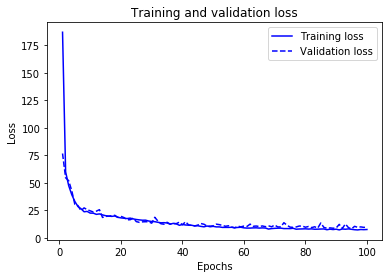

In [15]:
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

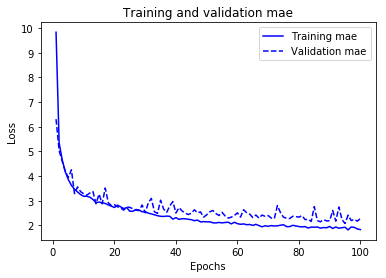

In [16]:
plt.plot(epochs, mae, 'b', label='Training mae')
plt.plot(epochs, val_mae, 'b--', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points 

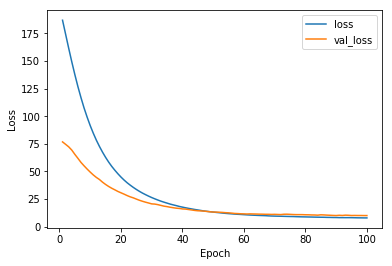

In [18]:
smooth_loss = smooth_curve(loss)
smooth_val_loss = smooth_curve(val_loss)

plt.plot(range(1,len(smooth_loss)+1), smooth_loss, label='loss')
plt.plot(range(1,len(smooth_loss)+1), smooth_val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

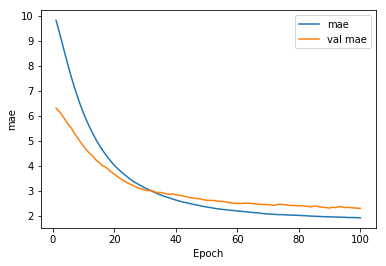

In [19]:
smooth_mae = smooth_curve(mae)
smooth_val_mae = smooth_curve(val_mae)

plt.plot(range(1,len(smooth_mae)+1), smooth_mae, label='mae')
plt.plot(range(1,len(smooth_mae)+1), smooth_val_mae,label='val mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend()
plt.show()